## GeoPandas
- Pandas + spatial operations on geometric types
- Pandas:
    - Probably the most useful data wrangling tool in the Python toolbox
    - Allows you to work with data frame structures in Python (as in the wonderful world of R)
    - Easy, expressive merging, joining, group-by operations, reshaping of heterogeneous typed columnar data

### Import GeoPandas and explore
- Geopandas has a built in method to see datasets avaialable with GeoPandas
- We'll read in, plot and explore NYC borrough boundary dataset that comes with GeoPandas to orient ourselves

In [1]:
import geopandas as gp
gp.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

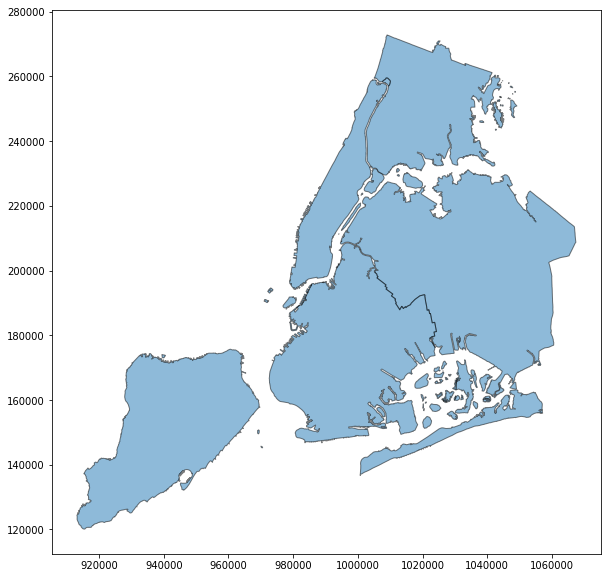

In [16]:
df = gp.read_file(gp.datasets.get_path('nybb'))
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

- We typically read in shapefiles and work with GeoDataFrames in GeoPandas
- It looks and acts for the most part just like a Pandas DataFrame

In [4]:
type(df)

geopandas.geodataframe.GeoDataFrame

We can explore our GeoDataFrame the same as we would in Pandas

In [22]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
BoroCode      5 non-null int64
BoroName      5 non-null object
Shape_Leng    5 non-null float64
Shape_Area    5 non-null float64
geometry      5 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 280.0+ bytes


In [5]:
df.describe()

,BoroCode,Shape_Leng,Shape_Area
count,5.000000,5.000000,5.000000e+00
mean,3.000000,558317.333911,1.685981e+09
std,1.581139,249002.452978,9.034868e+08
min,1.000000,330470.010332,6.364715e+08
25%,2.000000,359299.096471,1.186925e+09
50%,3.000000,464392.991824,1.623820e+09
75%,4.000000,741080.523166,1.937479e+09
max,5.000000,896344.047763,3.045213e+09


In [10]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


GeoDataFrame is a tabular geospatial vector dataset
- Attribute columns that are exactly same as Pandas DataFrame
- A 'Geometry' column that holds the geometry in wkt format

In [4]:
type(df.BoroName)

pandas.core.series.Series

In [5]:
type(df.geometry)

geopandas.geoseries.GeoSeries

In [8]:
type(df.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Let's stop and look at what shapely is all about...

- Shapely is it's own Python package
- Uses functions from GEOS (port of the Java Topology Suite (JTS))
- GEOS is the geometry engine for PostGIS
- Shapely allows PostGIS geometry operations outside a RDBMS
- Shapely adheres to Open Geospatial Consortium Simple Features specs
- Nicely Pythonic approaches to geometric operations on spatial data


In [17]:
df.geometry

0    (POLYGON ((970217.0223999023 145643.3322143555...
1    (POLYGON ((1029606.076599121 156073.8142089844...
2    (POLYGON ((1021176.479003906 151374.7969970703...
3    (POLYGON ((981219.0557861328 188655.3157958984...
4    (POLYGON ((1012821.805786133 229228.2645874023...
Name: geometry, dtype: object

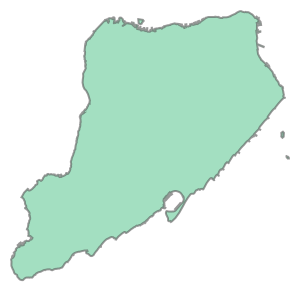

In [18]:
df.geometry[0]

In [21]:
df.BoroName[0]

'Staten Island'

- We indexed the first multipolygon record in the NY Boroughs data (Staten Island)
- We can drill into each polygon to see how data is stored withing the GeoSeries in GeoPandas
- 

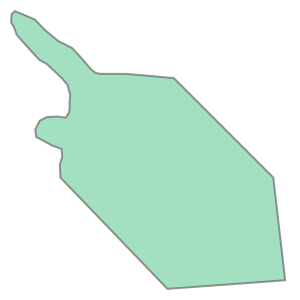

In [20]:
df.geometry[0][0]

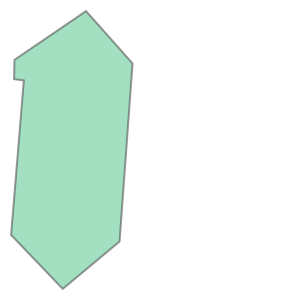

In [19]:
df.geometry[0][1]

In [25]:
from shapely.geometry import mapping
coords = mapping(df.geometry[0][0])
coords.keys()

dict_keys(['type', 'coordinates'])

In [29]:
coords

{'type': 'Polygon',
 'coordinates': (((970217.0223999023, 145643.33221435547),
   (970227.216003418, 145641.63360595703),
   (970273.9365844727, 145641.63360595703),
   (970323.2053833008, 145637.38598632812),
   (970362.7528076172, 145633.73638916016),
   (970547.9993896484, 145448.48999023438),
   (970570.1481933594, 145257.2030029297),
   (970350.6716308594, 145241.0946044922),
   (970151.3302001953, 145448.48999023438),
   (970150.3469848633, 145472.8823852539),
   (970154.6475830078, 145486.7398071289),
   (970153.6918334961, 145501.55200195312),
   (970134.9255981445, 145508.6401977539),
   (970115.466003418, 145519.23138427734),
   (970106.3872070312, 145524.01000976562),
   (970104.4761962891, 145538.3446044922),
   (970113.0767822266, 145554.5903930664),
   (970121.2760009766, 145558.6900024414),
   (970126.4559936523, 145561.28021240234),
   (970145.5687866211, 145562.23559570312),
   (970161.3370361328, 145560.32440185547),
   (970167.0709838867, 145568.92541503906),
   (970

In [24]:
coords['coordinates']

(((970217.0223999023, 145643.33221435547),
  (970227.216003418, 145641.63360595703),
  (970273.9365844727, 145641.63360595703),
  (970323.2053833008, 145637.38598632812),
  (970362.7528076172, 145633.73638916016),
  (970547.9993896484, 145448.48999023438),
  (970570.1481933594, 145257.2030029297),
  (970350.6716308594, 145241.0946044922),
  (970151.3302001953, 145448.48999023438),
  (970150.3469848633, 145472.8823852539),
  (970154.6475830078, 145486.7398071289),
  (970153.6918334961, 145501.55200195312),
  (970134.9255981445, 145508.6401977539),
  (970115.466003418, 145519.23138427734),
  (970106.3872070312, 145524.01000976562),
  (970104.4761962891, 145538.3446044922),
  (970113.0767822266, 145554.5903930664),
  (970121.2760009766, 145558.6900024414),
  (970126.4559936523, 145561.28021240234),
  (970145.5687866211, 145562.23559570312),
  (970161.3370361328, 145560.32440185547),
  (970167.0709838867, 145568.92541503906),
  (970168.5043945312, 145576.09259033203),
  (970168.5043945312,

### Workflows with GeoPandas
- We'll grab some publicly available data for city of Portland as geojson files
- Explore some simple analyses with data using GeoPandas

In [92]:
url = "https://opendata.arcgis.com/datasets/c525d5f666074c42aa4131fb9fcdf7f3_27.geojson"
trails = gp.read_file(url)

In [40]:
trails.head()

,OBJECTID,PROPERTYID,Local_Name,TYPE,STATUS,Manager,SURFACE,WIDTH_FT,SOURCE,Regional_trail,...,Springwater,Willamette_Greenway,Notes,Red_Electric,Hillsdale_Lake_Oswego,Fanno_Creek_Greenway,MILES,Shape_Length,Fire_access,geometry
0,1,NaN,St. Helens Road,on-street trail,existing,,bike lane,0.0,40milooprev_dgn,,...,,Willamette Greenway (interim),,,,,0.089773,206.678852,None,LINESTRING (-122.7849640049369 45.597741849139...
1,2,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,PP&R - CN,concrete,10.0,200702SL,regional trail,...,Springwater Corridor,,,,,,0.036589,83.855356,None,LINESTRING (-122.6368735799581 45.460978229348...
2,3,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,Gresham,asphalt,10.0,200703SL,regional trail,...,Springwater Corridor,,,,,,0.086325,198.061099,None,LINESTRING (-122.4308682233347 45.495186770245...
3,4,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,PP&R - CN,concrete,0.0,40milooprev_dgn,regional trail,...,Springwater Corridor,,,,,,0.048157,110.366973,None,LINESTRING (-122.6397373533883 45.460184288015...
4,5,679.0,Springwater Corridor,Trail/Path (6-12 ft.),existing,Gresham,asphalt,10.0,200703SL,regional trail,...,Springwater Corridor,,,,,,0.207378,476.172890,None,LINESTRING (-122.4210221703912 45.486589213518...


- Going back to plotting, it's easy to add backgrounds as well with other libraries
- We'll need to convert to web mercator to use background tiles

In [41]:
trails = trails.to_crs(epsg=3857)

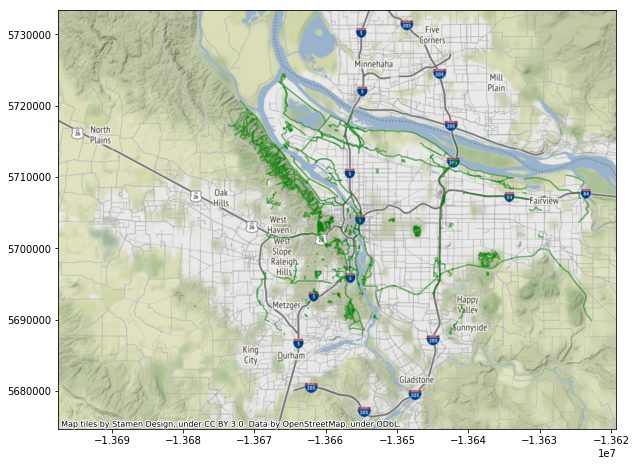

In [33]:
import contextily as ctx
import matplotlib.pyplot as plt
ax = trails.plot(figsize=(10, 10), alpha=0.5, edgecolor='g')
ctx.add_basemap(ax, zoom=11)
plt.show()

### Filtering in GeoPandas
- Find categories of a variable
- Create boolean index and subset records

In [37]:
print (trails['SURFACE'].unique())

['bike lane' 'concrete' 'asphalt' 'chipseal' 'water' 'soil' 'gravel'
 'bike / ped / vehicle share' 'sidewalk' 'road shoulder' 'bark ADA'
 'gravel (3/4" run)' 'asphalt (porous)' 'bike lane / sidewalk'
 'gravel (1/4" minus)' 'bark' 'metal' 'wood (untreated)' 'chips'
 'wood (treated)' 'stone' None]


In [38]:
dirt_trails = df[df['SURFACE']=='soil']

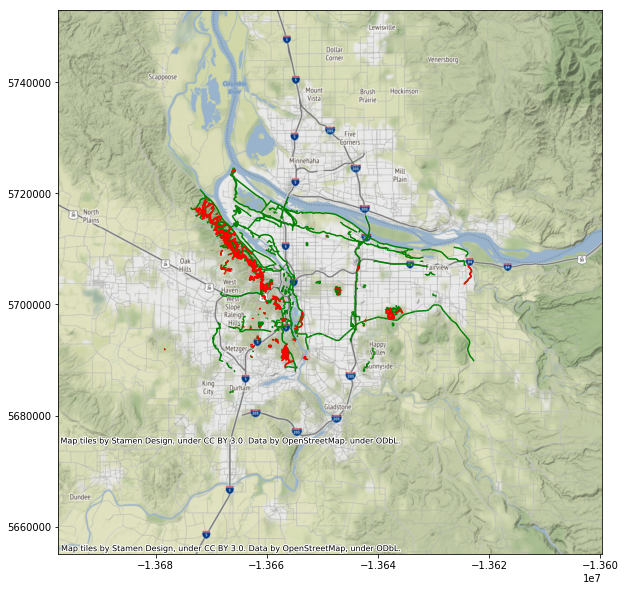

In [63]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=11)
ctx.add_basemap(dirt_trails.plot(ax=ax, color = 'red'), zoom=11)
plt.show()

### Grouping
- The power of Pandas with spatial data

In [58]:
trails.groupby(['Manager'])['MILES'].sum()

Manager
                                   0.124575
                                 122.199520
BES                                1.725596
Gresham                            7.609191
MCDD                               0.181731
Metro                              1.203559
North Clackamas Parks and Rec      0.235665
ODOT                              24.412219
OPRD                              13.666983
PBOT                               0.544896
PDOT                               4.743482
PDOT (adjacent landowners?)        2.420118
PP&R                              46.326938
PP&R - CN                        149.882184
Port of Portland                   2.022673
Portland Audubon                   1.651270
THPRD                              7.623373
Water bureau                       0.414734
existing owner                     1.307943
Name: MILES, dtype: float64

### Spatial Operations
- Bring in another Portland maps data layer and perform some typical spatial operations

In [69]:
url = "https://opendata.arcgis.com/datasets/9f50a605cf4945259b983fa35c993fe9_125.geojson"
neighborhoods = gp.read_file(url)


HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
http://tile.stamen.com/terrain/12/581/1801.png

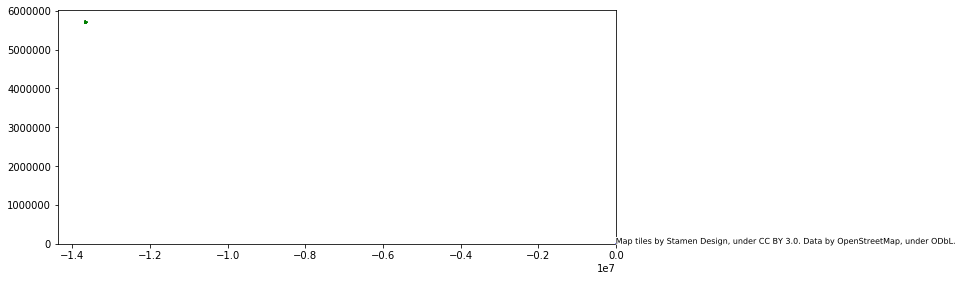

In [70]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(neighborhoods.plot(ax=ax, color = 'none', edgecolor='blue'), zoom=12)
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=12)
plt.show()

Coordinate reference systems are crucial using GeoPandas!

In [71]:
neighborhoods = neighborhoods.to_crs(trails.crs)

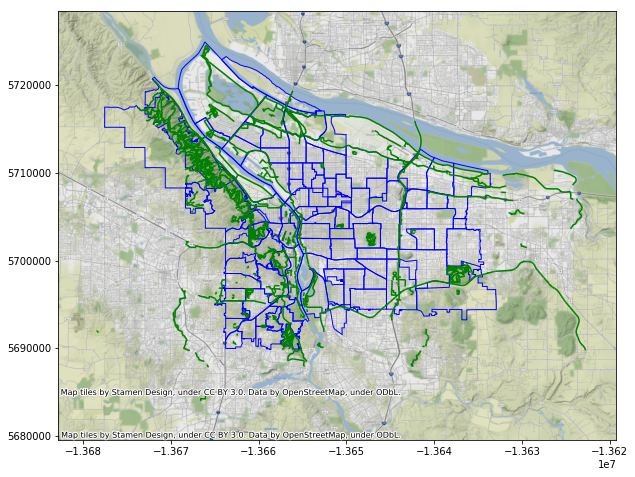

In [73]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(neighborhoods.plot(ax=ax, color = 'none', edgecolor='blue'), zoom=13)
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=13)
plt.show()

### Spatial join and summarise
- What is the total length of trails in each Portland neighborhood?
- Remember, coordinate reference systems crucial!
- For spatial overlay, it's best we're in a planar CRS
- I looked up the EPSG code for UTM10N [here](http://spatialreference.org/ref/epsg/nad83-utm-zone-10n/)

In [94]:
trails = trails.to_crs(epsg=26910)
neighborhoods = neighborhoods.to_crs(epsg=26910)
# drop columns
#neighborhoods = neighborhoods.drop(['OBJECTID','COMMPLAN','COALIT','SHARED','HORZ_VERT','MAPLABEL',
#                                    'Shape_Length','Shape_Area'], axis=1)
trails = trails[['MILES','geometry']]


In [106]:
neighborhoods_and_trails = gp.sjoin(neighborhoods, trails, how="inner", op='contains')
neighborhoods_and_trails.head()


,NAME,ID,geometry,index_right,MILES
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",1249,0.237642
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",1391,0.386299
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",543,0.018165
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",542,0.009599
0,CATHEDRAL PARK,31,"POLYGON ((519681.5246868905 5047017.287671621,...",540,0.017255


In [111]:
grouped = neighborhoods_and_trails.groupby(['NAME'])['MILES'].sum().reset_index()
grouped.sort_values('MILES', ascending=False).head()

,NAME,MILES
17,FOREST PARK,76.749665
29,LINNTON,64.055723
2,ARLINGTON HEIGHTS,17.257251
49,PLEASANT VALLEY,15.134122
58,ST. JOHNS,14.830995


## Rasterio
- 

In [2]:
import rasterio as rio